### This is a notebook for comparing predicted segmentation with ground truth segmentations (validation dataset)

In [31]:
from cellpose import utils, dynamics, metrics, plot, io
from numba import jit
from scipy.optimize import linear_sum_assignment
from scipy.ndimage import convolve, mean
import numpy as np
import matplotlib.pyplot as plt

### Loading of *_seg.npy files which contains 

In [32]:
!pwd

/dtu/blackhole/1d/203261/DL_project/Cell_Segmentation_DL_project/ona/validation


In [35]:
import os, io
current_dir = os.getcwd()

# putting .npy files into a list and sorting the list
ground_truth = [file for file in os.listdir("ground_truth") if file.endswith(".npy")]    
cyto3_pred = [file for file in os.listdir("cyto3_predictions") if file.endswith(".npy")] 
ground_truth_npy = sorted(ground_truth_npy)
cyto3_pred_npy = sorted(cyto3_pred_npy)

print(ground_truth_npy)
#print(cyto3_pred_npy)

# loading each .npy file into a list and extract only the 'masks' field
groundtruth_masks = [np.load(os.path.join("ground_truth", file), allow_pickle=True).item()['masks'] for file in ground_truth]
predicted_masks = [np.load(os.path.join("cyto3_predictions", file), allow_pickle=True).item()['masks'] for file in cyto3_pred]

print("Number of .npy files loaded:", len(groundtruth_masks))

# accessing the 'masks' directly from the lists
masks_true, mask_pred = groundtruth_masks, predicted_masks

['tile_0003_0023_seg.npy', 'tile_0003_0024_seg.npy', 'tile_0003_0025_seg.npy', 'tile_0003_0027_seg.npy', 'tile_0009_0011_seg.npy', 'tile_0009_0012_seg.npy', 'tile_0027_0010_seg.npy', 'tile_0027_0011_seg.npy', 'tile_0027_0012_seg.npy', 'tile_0027_0013_seg.npy', 'tile_0027_0014_seg.npy', 'tile_0029_0008_seg.npy', 'tile_0029_0009_seg.npy', 'tile_0029_0010_seg.npy', 'tile_0029_0011_seg.npy', 'tile_0029_0012_seg.npy', 'tile_0029_0013_seg.npy', 'tile_0029_0014_seg.npy', 'tile_0029_0015_seg.npy', 'tile_0029_0016_seg.npy']
Number of .npy files loaded: 20


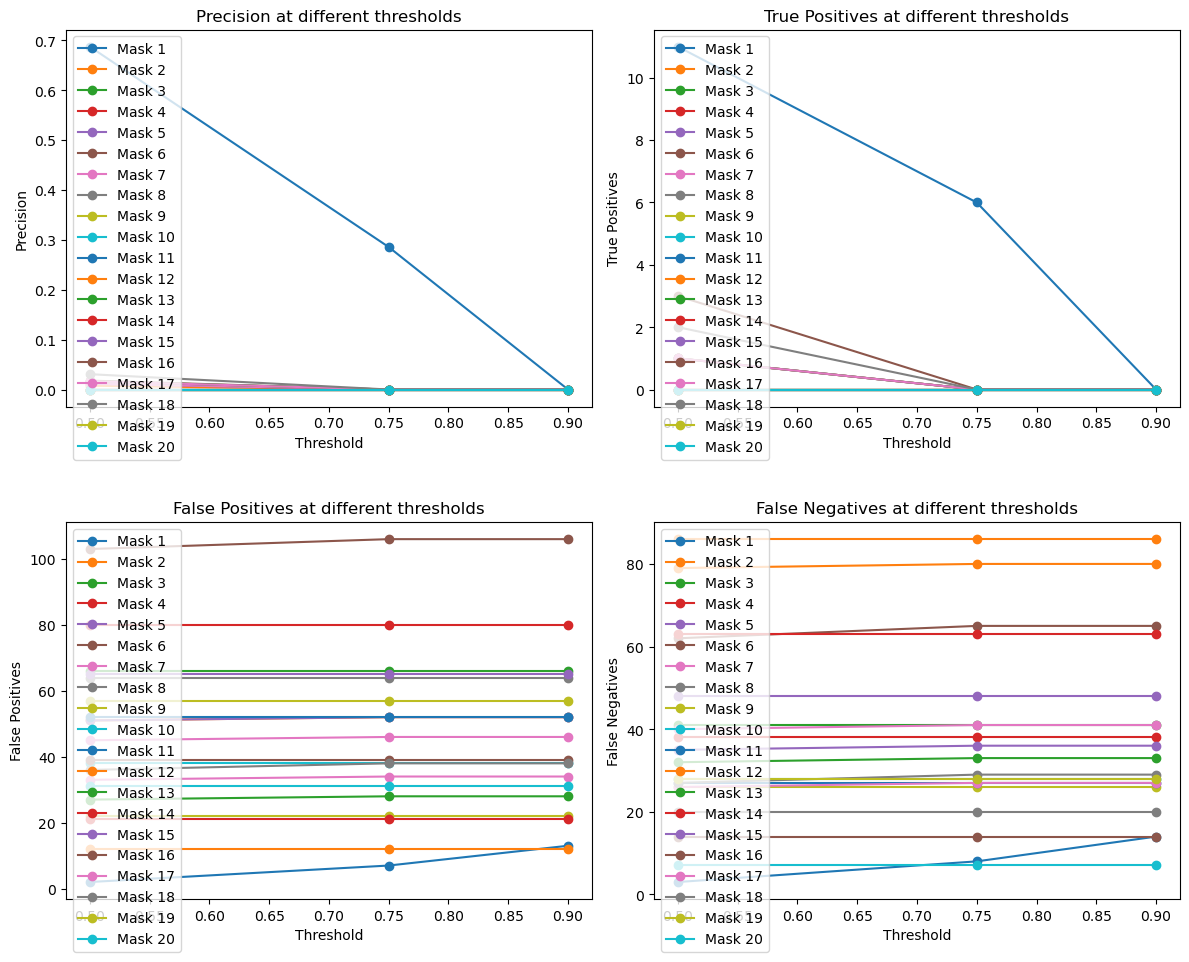

In [34]:
# compute the average precision as follows:
avr_precision = metrics.average_precision(masks_true, masks_pred)

# extract values from the output
precision = avr_precision[0]  # Precision at different thresholds
tp = avr_precision[1]         # True Positives at different thresholds
fp = avr_precision[2]         # False Positives at different thresholds
fn = avr_precision[3]         # False Negatives at different thresholds

# Set up the plot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Precision at different thresholds
axs[0, 0].plot([0.5, 0.75, 0.9], precision.T, marker='o')
axs[0, 0].set_title('Precision at different thresholds')
axs[0, 0].set_xlabel('Threshold')
axs[0, 0].set_ylabel('Precision')
axs[0, 0].legend([f'Mask {i+1}' for i in range(precision.shape[0])], loc='upper left')

# Plot 2: True Positives at different thresholds
axs[0, 1].plot([0.5, 0.75, 0.9], tp.T, marker='o')
axs[0, 1].set_title('True Positives at different thresholds')
axs[0, 1].set_xlabel('Threshold')
axs[0, 1].set_ylabel('True Positives')
axs[0, 1].legend([f'Mask {i+1}' for i in range(tp.shape[0])], loc='upper left')

# Plot 3: False Positives at different thresholds
axs[1, 0].plot([0.5, 0.75, 0.9], fp.T, marker='o')
axs[1, 0].set_title('False Positives at different thresholds')
axs[1, 0].set_xlabel('Threshold')
axs[1, 0].set_ylabel('False Positives')
axs[1, 0].legend([f'Mask {i+1}' for i in range(fp.shape[0])], loc='upper left')

# Plot 4: False Negatives at different thresholds
axs[1, 1].plot([0.5, 0.75, 0.9], fn.T, marker='o')
axs[1, 1].set_title('False Negatives at different thresholds')
axs[1, 1].set_xlabel('Threshold')
axs[1, 1].set_ylabel('False Negatives')
axs[1, 1].legend([f'Mask {i+1}' for i in range(fn.shape[0])], loc='upper left')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [40]:
#!pip install scikit-image
from skimage import io

dat = np.load('ground_truth/tile_0003_0023_seg.npy', allow_pickle=True).item()
img = io.imread('ground_truth/tile_0003_0023.png')
dat.keys()

dict_keys(['outlines', 'colors', 'masks', 'chan_choose', 'filename', 'flows', 'ismanual', 'manual_changes', 'model_path', 'flow_threshold', 'cellprob_threshold', 'normalize_params', 'restore', 'ratio', 'diameter'])

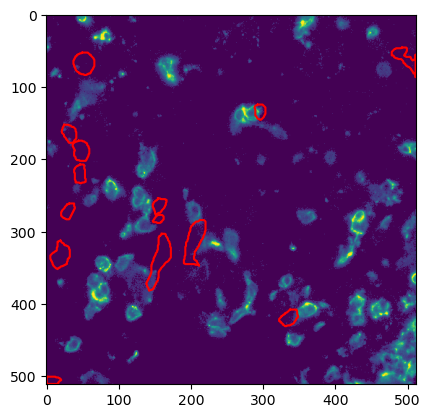

In [52]:
import numpy as np
from cellpose import plot, utils, io

dat1 = np.load('ground_truth/tile_0029_0015_seg.npy', allow_pickle=True).item()
dat2 = np.load('cyto3_predictions/tile_0029_0015_seg.npy', allow_pickle=True).item()

img = io.imread('ground_truth/tile_0029_0015.png')

# plot image with masks overlaid
mask_RGB = plot.mask_overlay(img, dat['masks'])

# plot image with outlines overlaid in red
outlines = utils.outlines_list(dat['masks'])
plt.imshow(img)
for o in outlines:
    plt.plot(o[:,0], o[:,1], color='r')

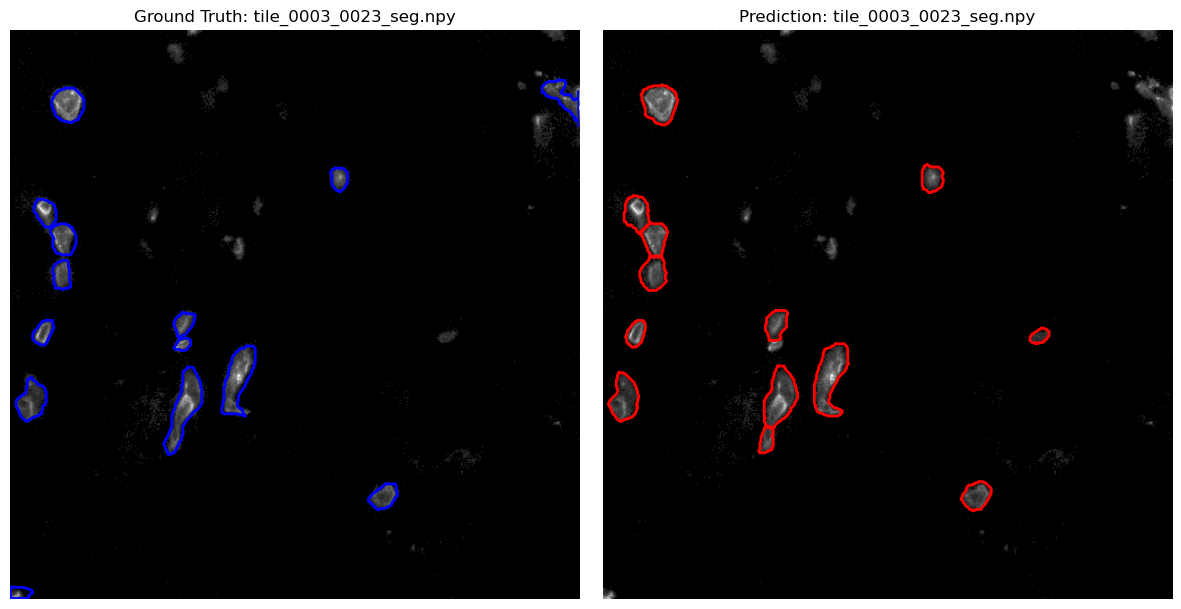

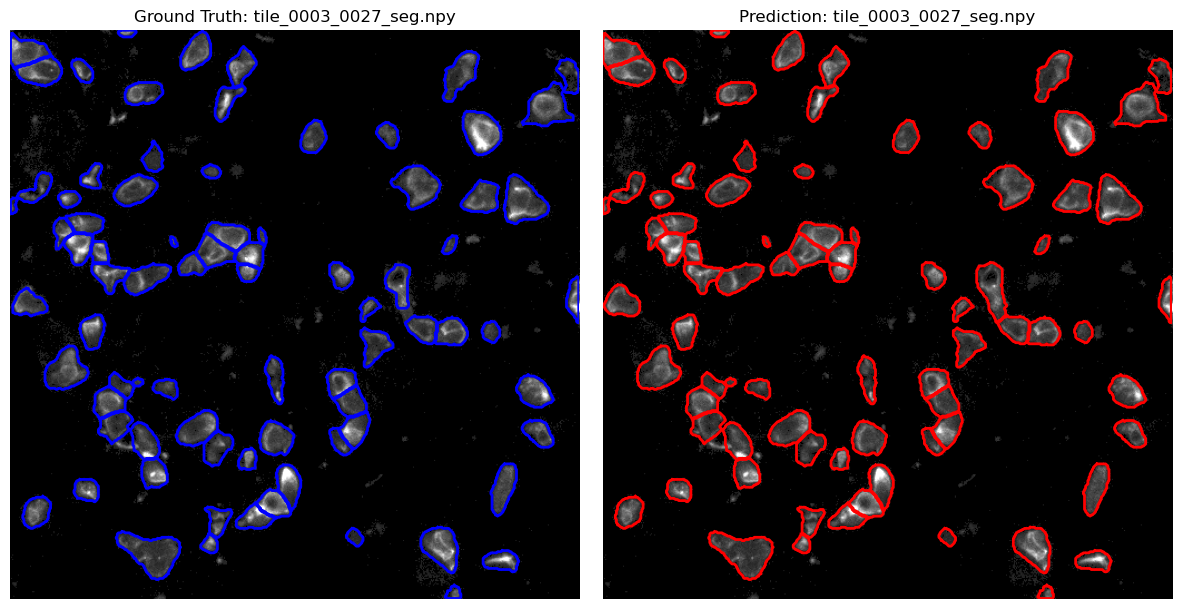

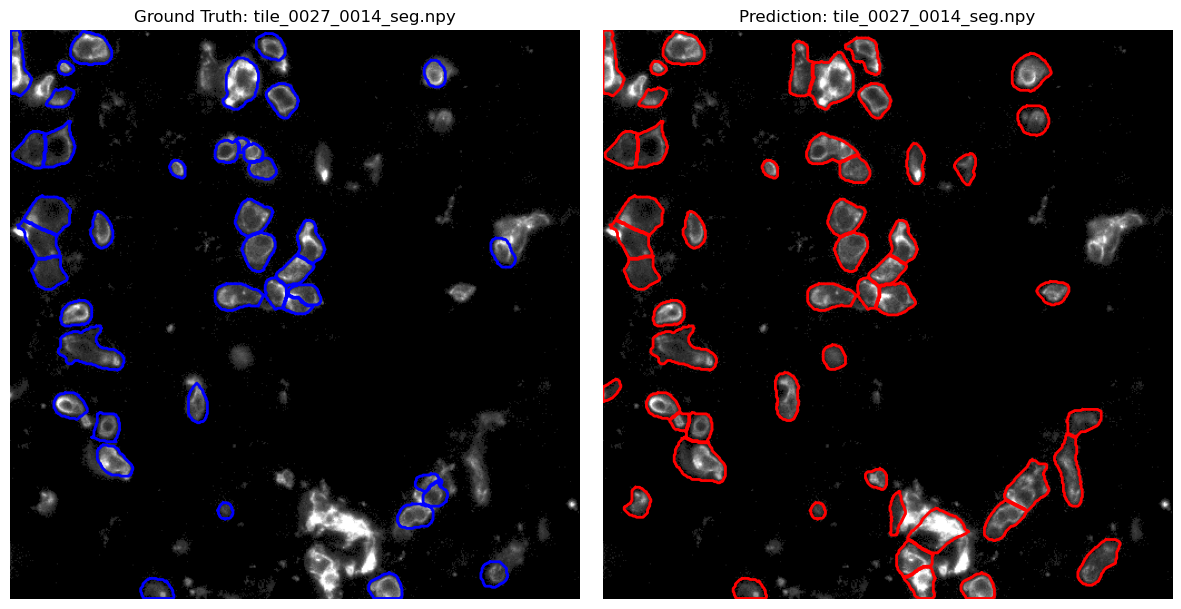

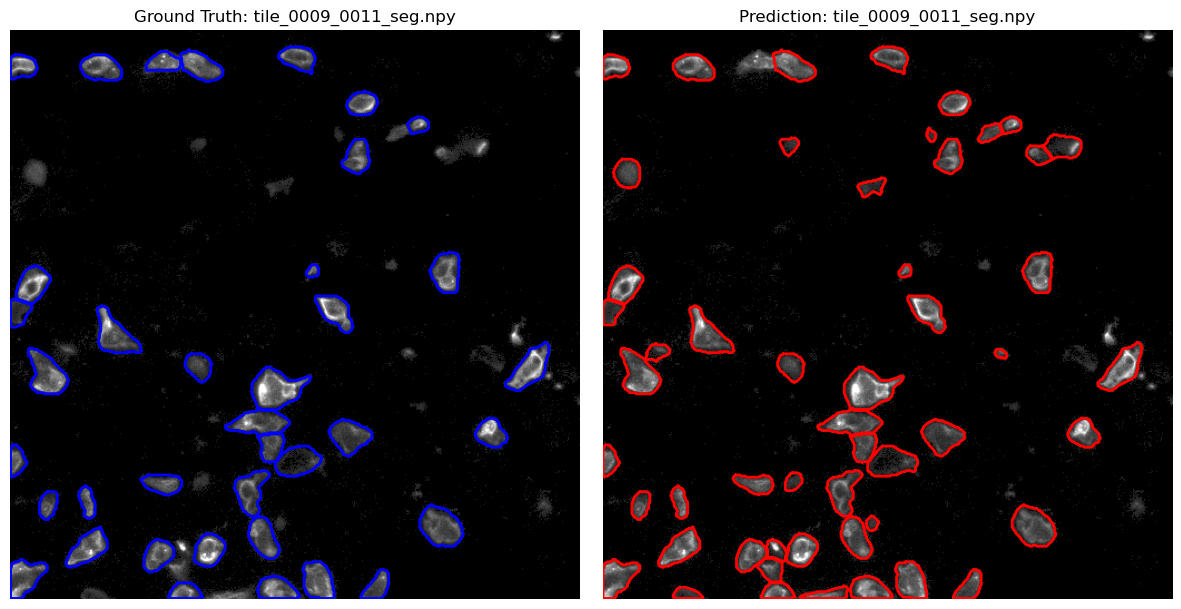

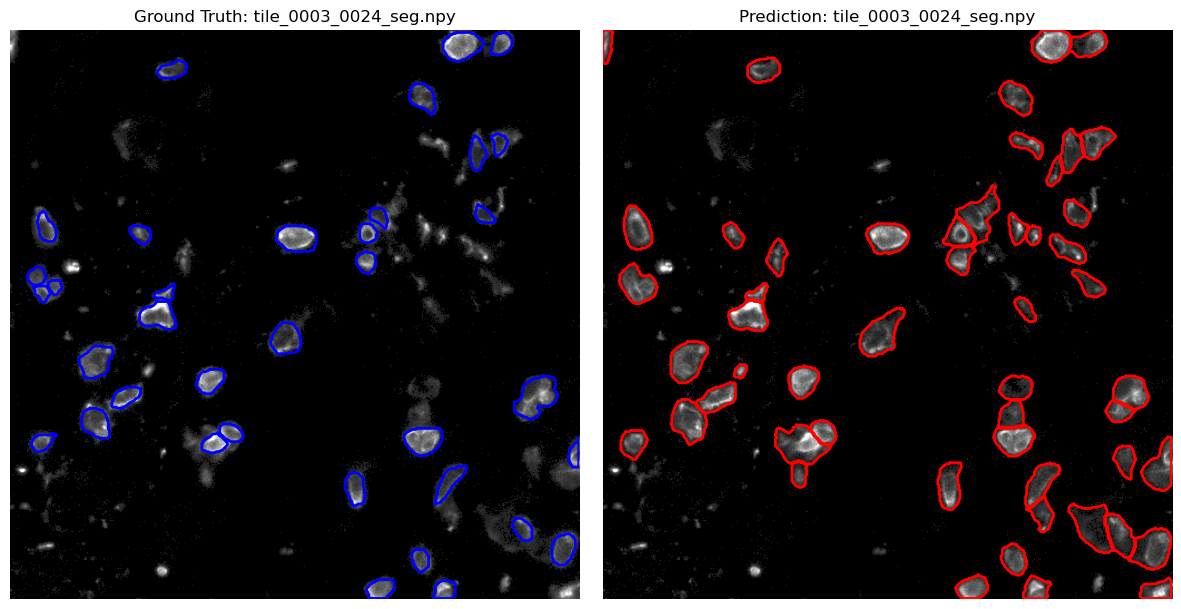

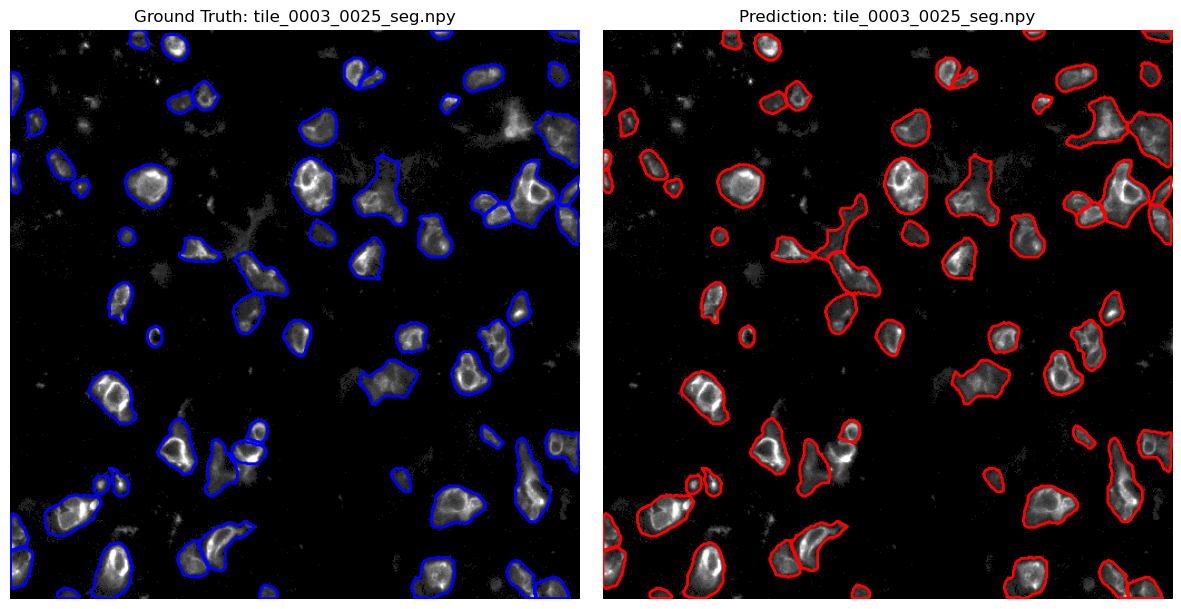

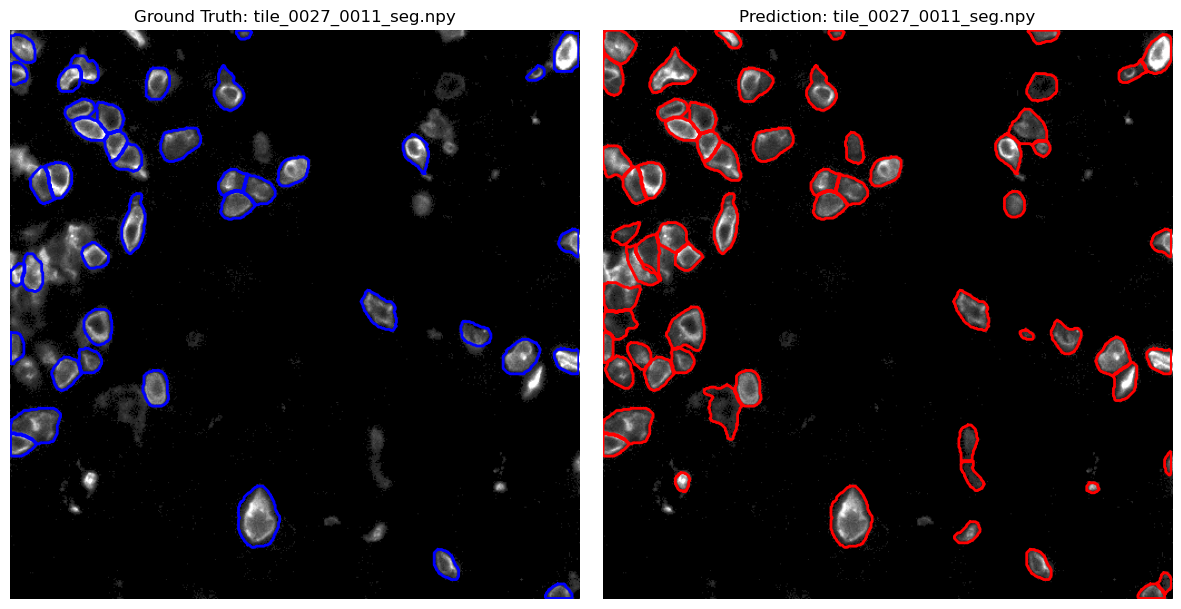

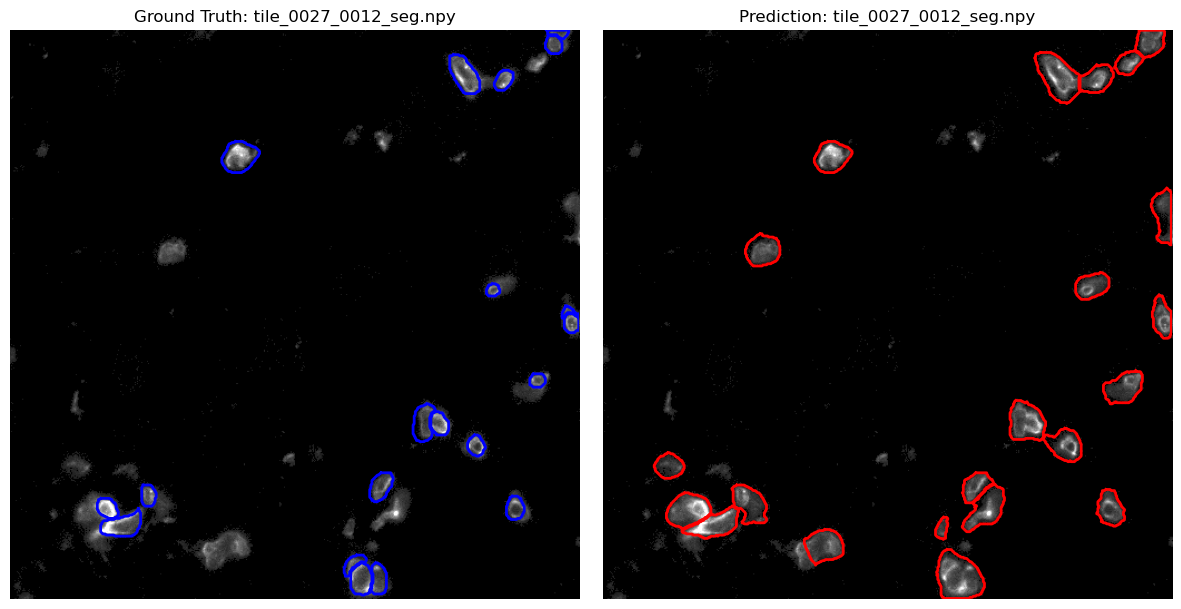

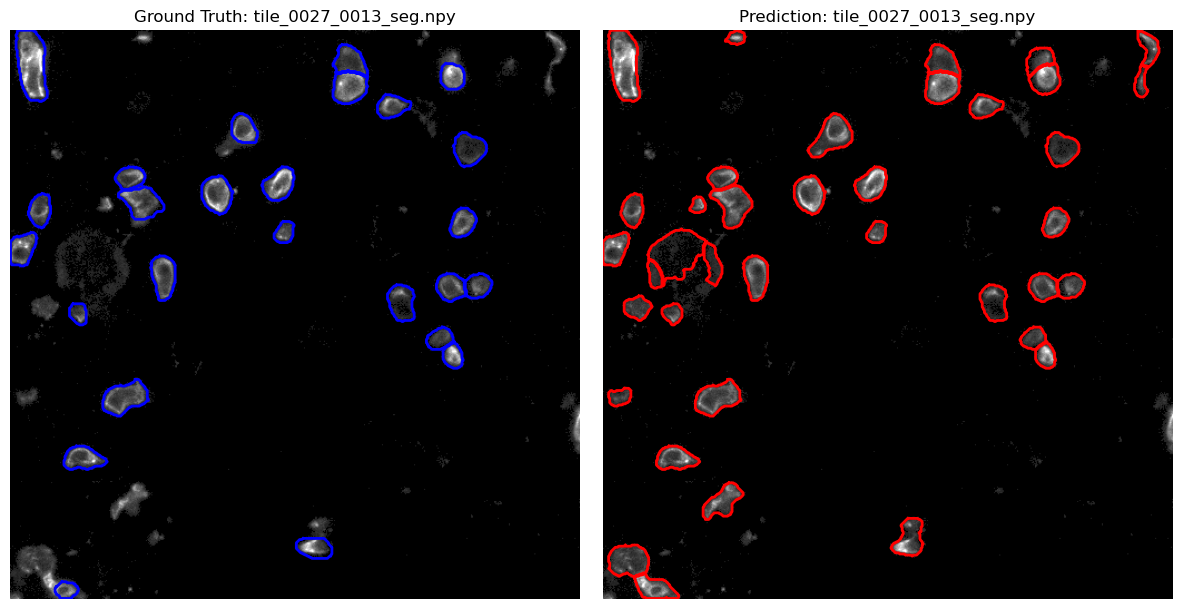

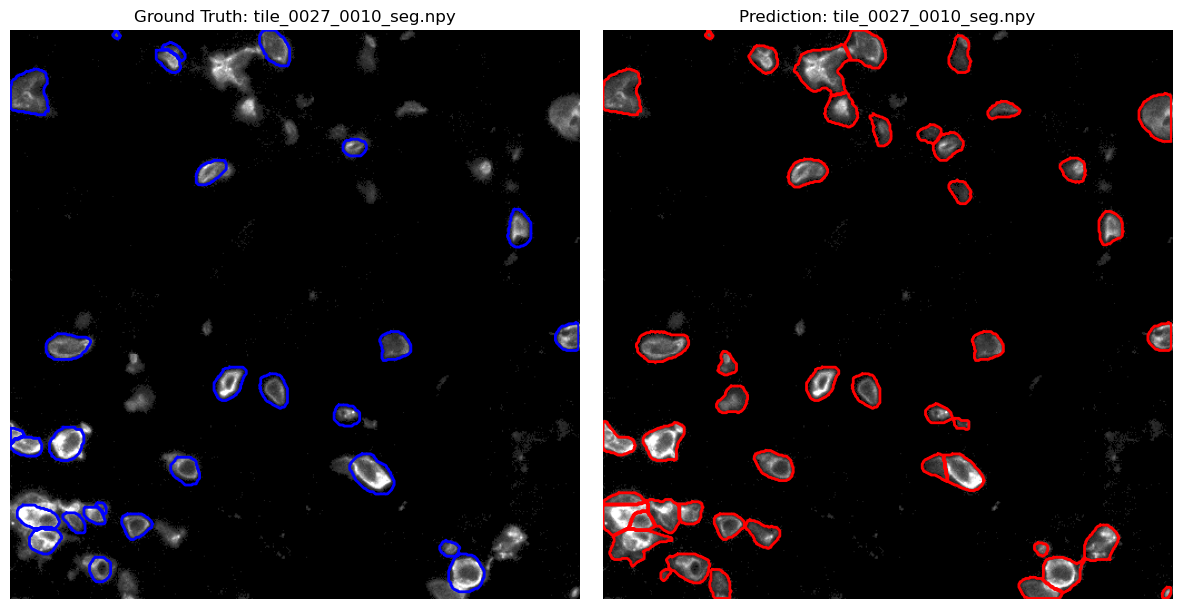

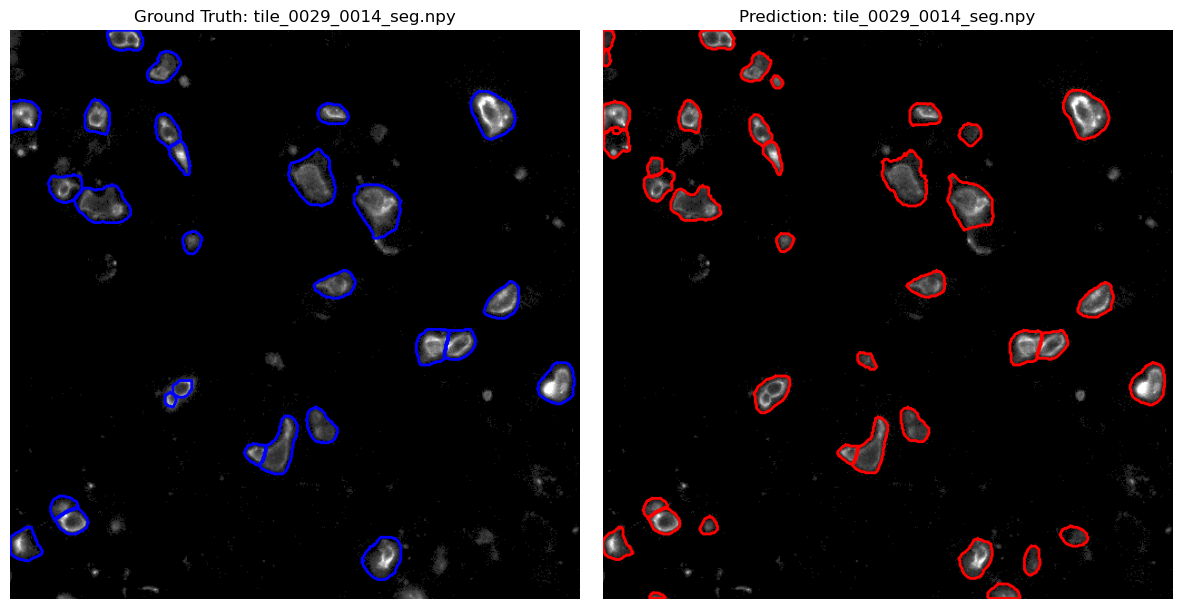

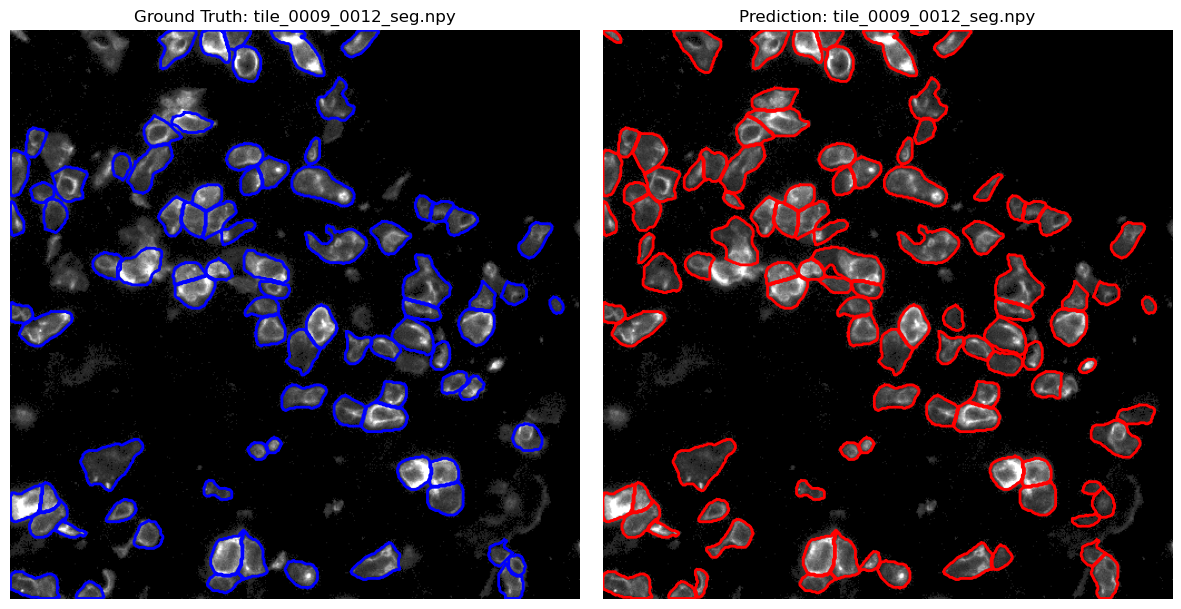

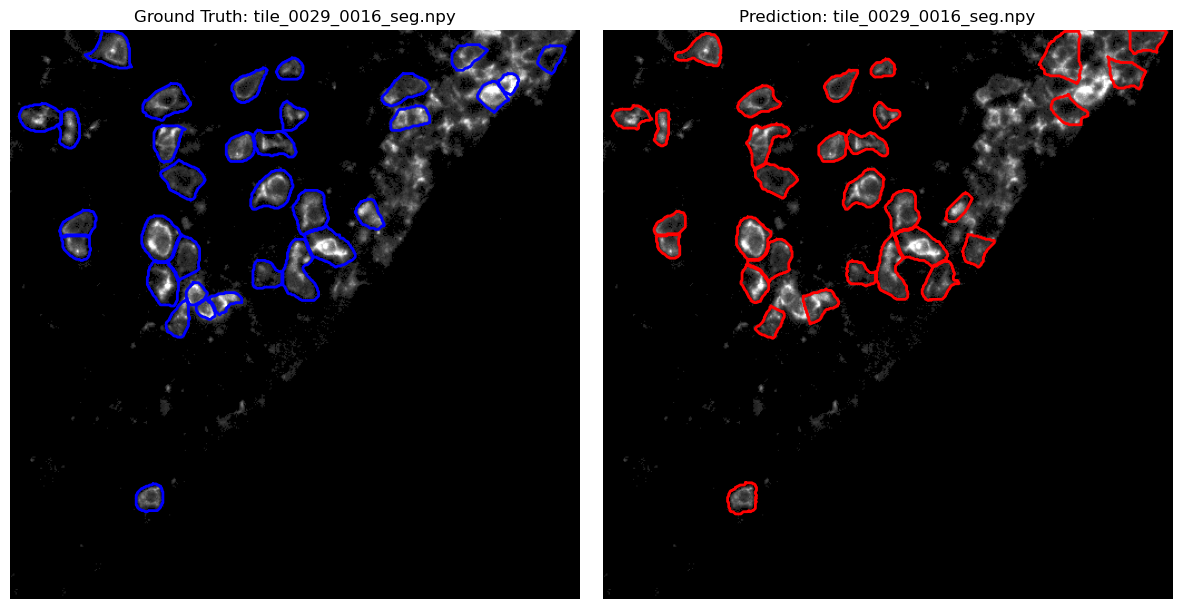

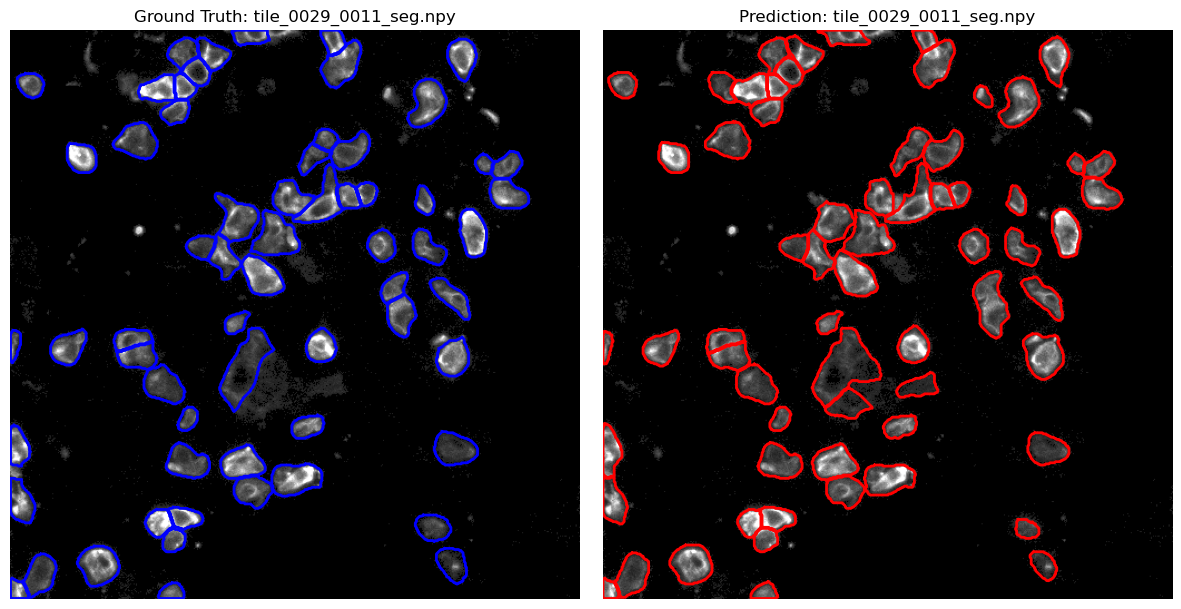

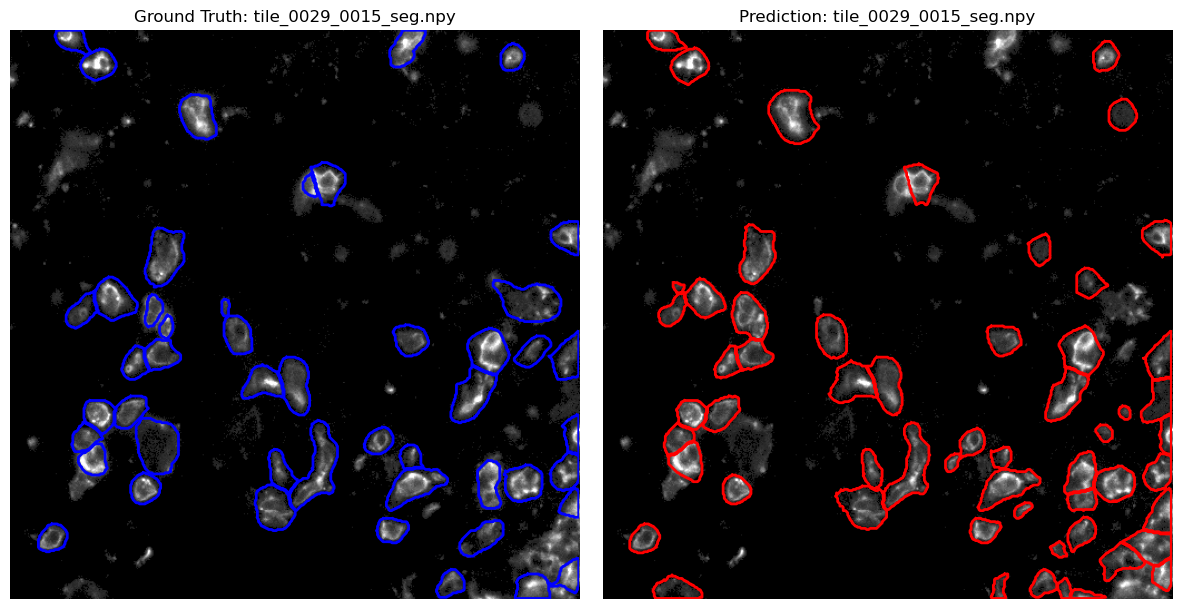

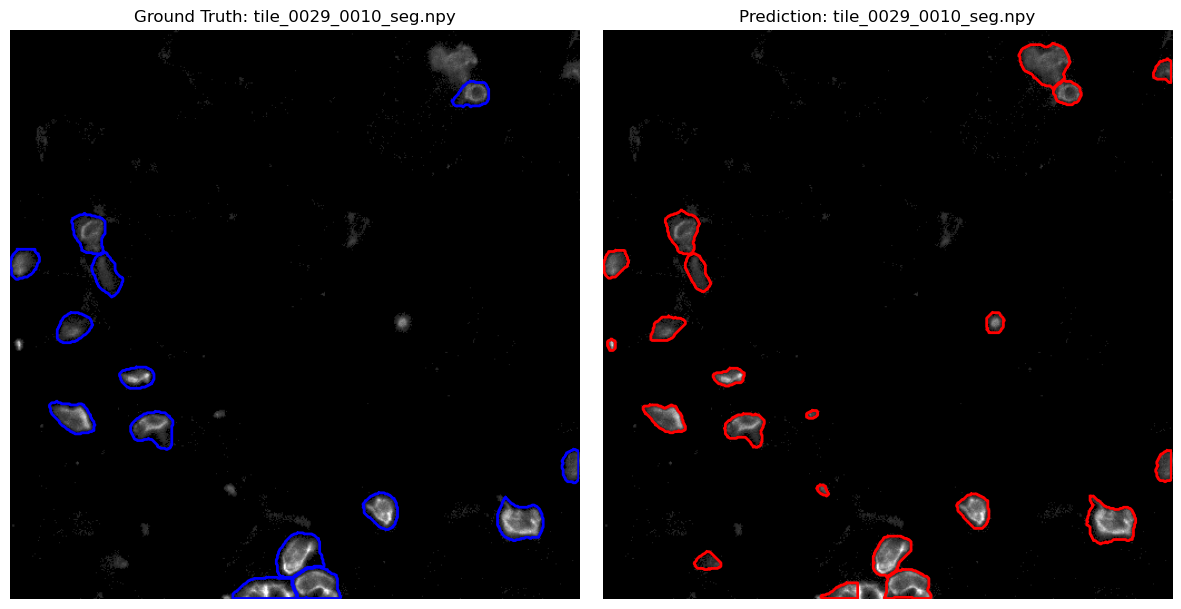

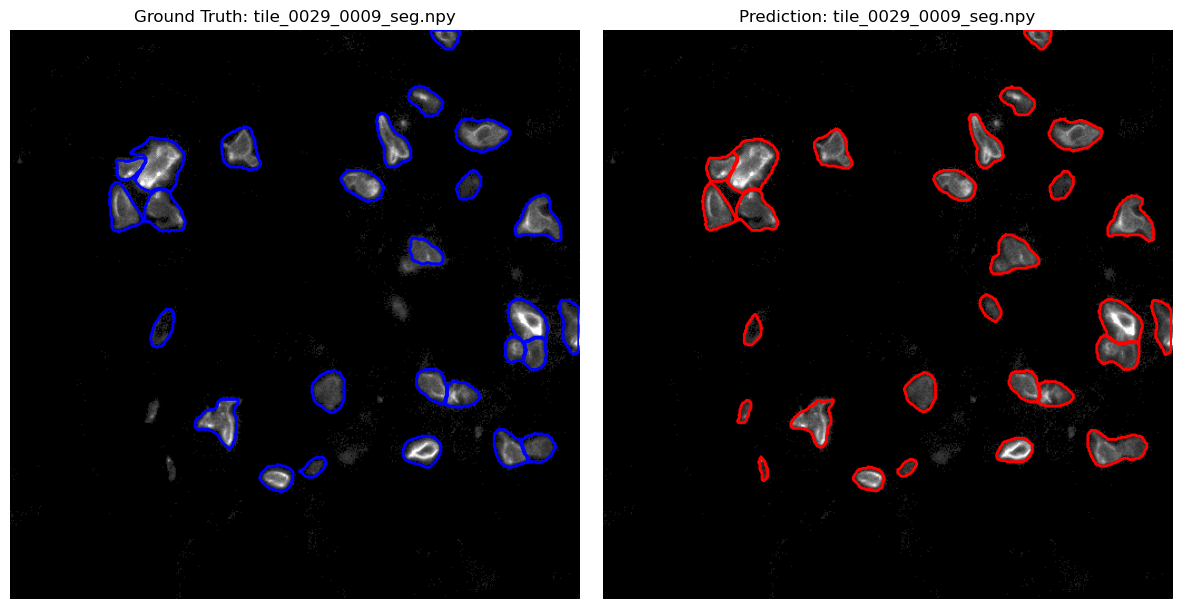

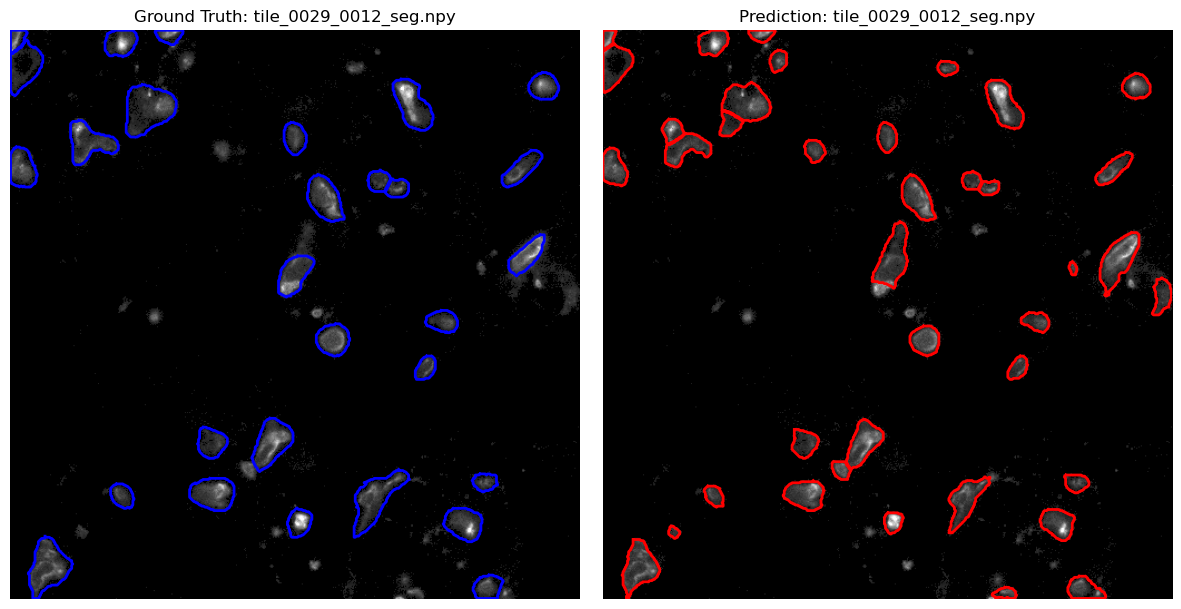

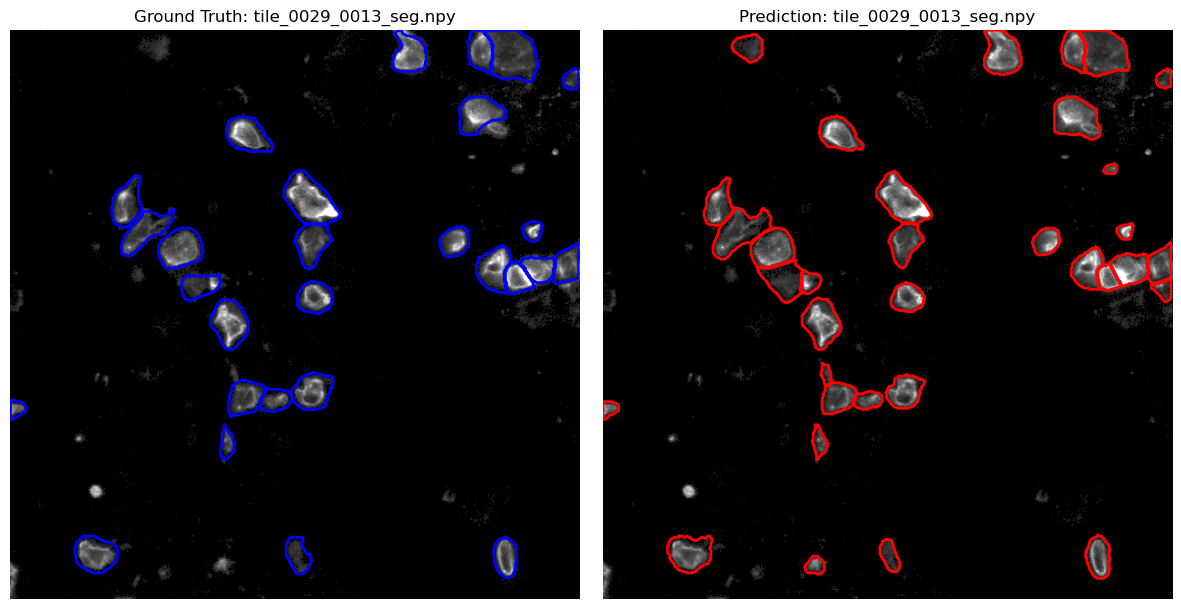

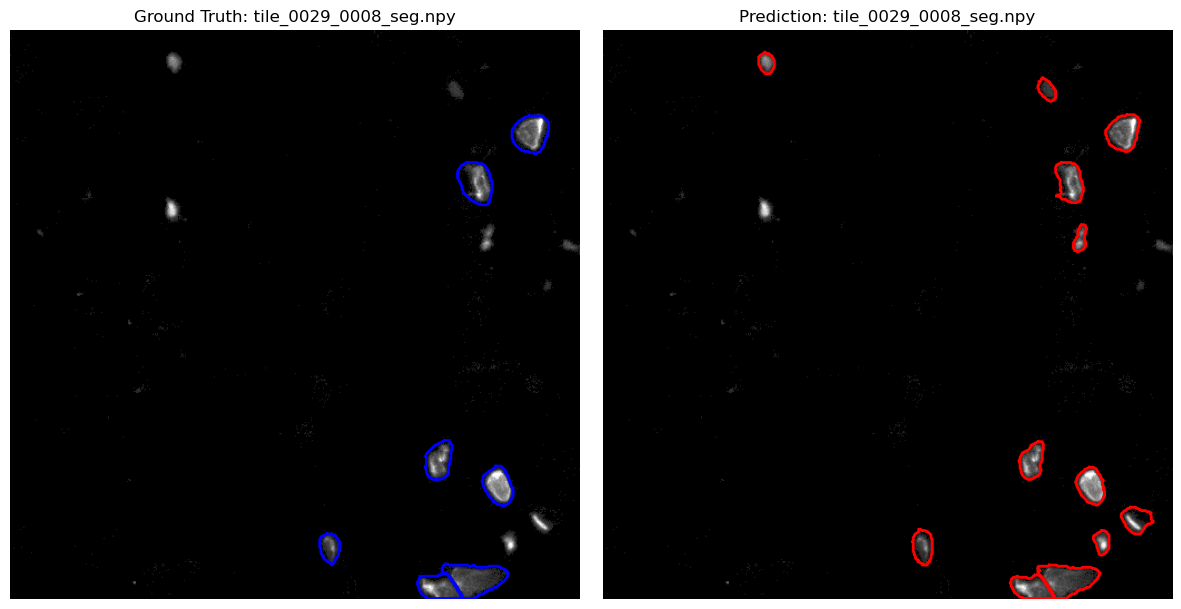

In [53]:
import numpy as np
from cellpose import plot, utils, io
import matplotlib.pyplot as plt
import os

# Define paths
ground_truth_dir = "ground_truth"
cyto3_predictions_dir = "cyto3_predictions"

# Get all files in directories
ground_truth_files = [f for f in os.listdir(ground_truth_dir) if f.endswith("_seg.npy")]
prediction_files = [f for f in os.listdir(cyto3_predictions_dir) if f.endswith("_seg.npy")]

# Function to plot outlines with a single color
def plot_outlines(image, masks, ax, title, color):
    ax.imshow(image, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
    outlines = utils.outlines_list(masks)
    for outline in outlines:
        ax.plot(outline[:, 0], outline[:, 1], color=color, lw=2)

# Plot each file side by side
for file in ground_truth_files:
    # Load data
    gt_dat = np.load(os.path.join(ground_truth_dir, file), allow_pickle=True).item()
    pred_dat = np.load(os.path.join(cyto3_predictions_dir, file), allow_pickle=True).item()
    
    # Corresponding image file
    image_file = file.replace("_seg.npy", ".png")
    img = io.imread(os.path.join(ground_truth_dir, image_file))
    
    # Create figure with side-by-side images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot ground truth outlines in blue
    plot_outlines(img, gt_dat['masks'], axes[0], f"Ground Truth: {file}", color='blue')
    
    # Plot predicted outlines in red
    plot_outlines(img, pred_dat['masks'], axes[1], f"Prediction: {file}", color='red')
    
    plt.tight_layout()
    plt.show()